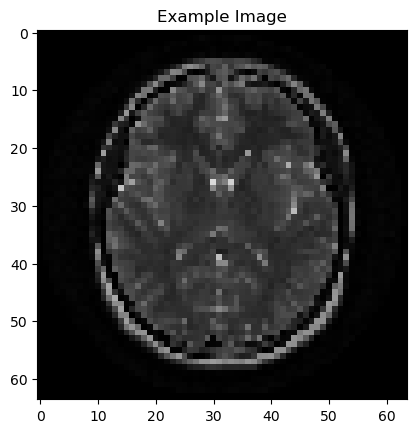

X_train shape: (202, 64, 64, 3)
y_train shape: (202, 2)
X_val shape: (51, 64, 64, 3)
y_val shape: (51, 2)


In [3]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt




# NO TUMOR 
no_tumor_class_paths = [
    "C:\\Users\\nh013\\Desktop\\Brain MRI Images for Brain Tumor Detection\\no"
]

no_tumor_data_path = "C:\\Users\\nh013\\Desktop\\Brain MRI Images for Brain Tumor Detection"

# YES TUMOR
yes_tumor_class_paths = [
   "C:\\Users\\nh013\\Desktop\\Brain MRI Images for Brain Tumor Detection\\yes"
]

yes_tumor_data_path = "C:\\Users\\nh013\\Desktop\\Brain MRI Images for Brain Tumor Detection"



# LOAD TRAINING IMAGES AND LABELS
train_images = []
train_labels = []



# LOAD NO TUMOR IMAGE 
for class_path in no_tumor_class_paths:
    for filename in os.listdir(class_path):
        img_path = os.path.join(class_path, filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (64, 64))  # RESIZE IMAGE
        train_images.append(img)
        train_labels.append(0)  # LABEL 0 FOR NO TUMOR 
        
        
        
# LOAD YES TUMOR IMAGE 
for class_path in yes_tumor_class_paths:
    for filename in os.listdir(class_path):
        img_path = os.path.join(class_path, filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (64, 64))  # RESIZE IMAGE
        train_images.append(img)
        train_labels.append(1)  # LABEL 1 FOR YES TUMOR
        
        
        
        
# CONVERT TRAINING DATA TO NUMPY ARRAYS
train_images = np.array(train_images)
train_labels = np.array(train_labels)

# NORMALIZE PIXEL VALUES
train_images = train_images / 255.0

# SPLIT TRAINING DATA INTO TRAINING AND VALIDATION SET
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# CONVERT LABELS TO ONE-HOT ENCODING
y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)



# DATA AUGMENTATION
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

datagen.fit(X_train)


example_image = train_images[0]  
plt.imshow(example_image)
plt.title("Example Image")
plt.show()


print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)


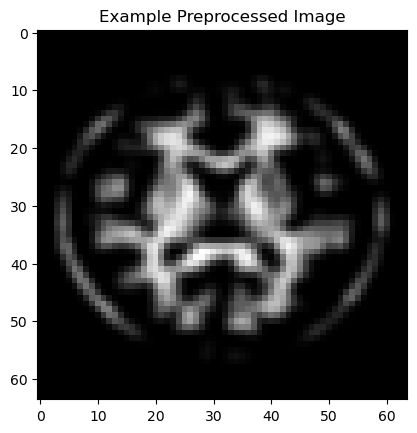

In [6]:
#perform  histogram equalization, Gaussian blur, and pixel value normalization 

import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from skimage import exposure
import matplotlib.pyplot as plt

# NO TUMOR
no_tumor_class_paths = [
    "C:\\Users\\nh013\\Desktop\\Brain MRI Images for Brain Tumor Detection\\no"
]

# YES TUMOR
yes_tumor_class_paths = [
   "C:\\Users\\nh013\\Desktop\\Brain MRI Images for Brain Tumor Detection\\yes"
]




# FUNCTION FOR .........PREPROCESSING
def advanced_preprocess(img):
    
    # HISTOGRAM EQULAIZATION
    img = exposure.equalize_adapthist(img)

    #GAUSSIAN BLUR
    img = cv2.GaussianBlur(img, (3, 3), 0)

    # RESCLAE TO THR RANGE [-1, 1]
    img = (img - 0.5) / 0.5

    return img




# LOAD TRAINING IMAGES AND LABELS
train_images = []
train_labels = []

# LOAD NO TUMOR IMAGE
for class_path in no_tumor_class_paths:
    for filename in os.listdir(class_path):
        img_path = os.path.join(class_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (64, 64))  # RESIZE IMAGE
        img = advanced_preprocess(img)
        train_images.append(img)
        train_labels.append(0)  # LABEL 0 FOR NO TUMOR

# LOAD YES TUMOR IMAGE
for class_path in yes_tumor_class_paths:
    for filename in os.listdir(class_path):
        img_path = os.path.join(class_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (64, 64))  # RESIZE IMAGE
        img = advanced_preprocess(img)
        train_images.append(img)
        train_labels.append(1)  # LABEL 1 FOR YES TUMOR

        
        
        
# CONVERT TRAINING DATA TO NUMPY ARRAYS
train_images = np.array(train_images)
train_labels = np.array(train_labels)

# NORMALIZE PIXEL VALUES
train_images = train_images / 255.0



# SPLIT TRAINING DATA INTO TRAINING AND VALIDATION SET
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Add an extra dimension to the images
X_train = np.expand_dims(X_train, axis=-1)
X_val = np.expand_dims(X_val, axis=-1)




# CONVERT LABELS TO ONE-HOT ENCODING
y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)

# DATA AUGMENTATION
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,  
    fill_mode='nearest'  
)

datagen.fit(X_train)



example_image = advanced_preprocess(X_train[0])
plt.imshow(example_image, cmap='gray')
plt.title("Example Preprocessed Image")
plt.show()


Epoch 1/50


C:\Users\nh013\AppData\Local\Temp\ipykernel_7308\2722699110.py:110: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),


7/6 [=================================] - ETA: 0s - loss: 0.6926 - accuracy: 0.5644
Epoch 1: val_loss improved from inf to 0.69136, saving model to best_model.h5
6/6 [==============================] - 2s 209ms/step - loss: 0.6926 - accuracy: 0.5644 - val_loss: 0.6914 - val_accuracy: 0.6078
Epoch 2/50
7/6 [=================================] - ETA: 0s - loss: 0.6906 - accuracy: 0.6139
Epoch 2: val_loss improved from 0.69136 to 0.68818, saving model to best_model.h5
6/6 [==============================] - 1s 194ms/step - loss: 0.6906 - accuracy: 0.6139 - val_loss: 0.6882 - val_accuracy: 0.6078
Epoch 3/50
7/6 [=================================] - ETA: 0s - loss: 0.6862 - accuracy: 0.6139
Epoch 3: val_loss improved from 0.68818 to 0.68361, saving model to best_model.h5
6/6 [==============================] - 1s 167ms/step - loss: 0.6862 - accuracy: 0.6139 - val_loss: 0.6836 - val_accuracy: 0.6078
Epoch 4/50
7/6 [=================================] - ETA: 0s - loss: 0.6800 - accuracy: 0.6139
Ep

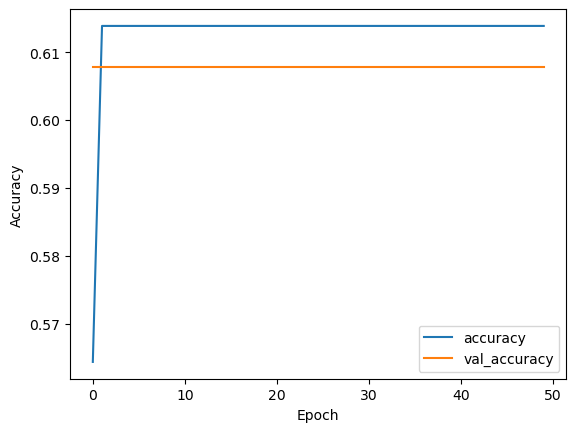

2/2 [==============================] - 0s 30ms/step


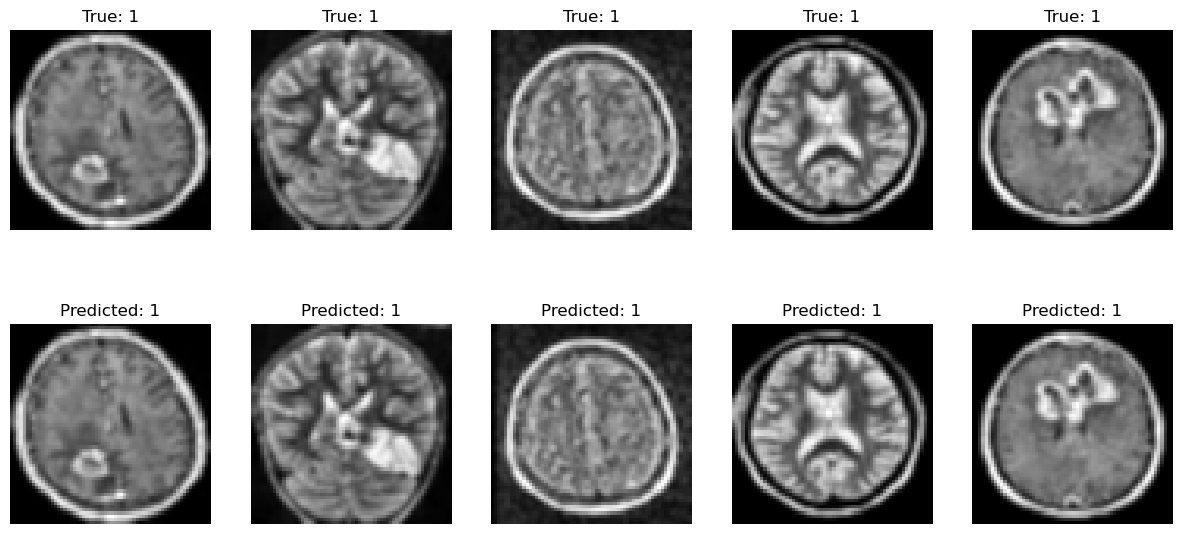

In [8]:
#PERFORM CNN MODEL TO CLASSIFY NO TUMOR AND YES TUMOR 


import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from skimage import exposure
from keras.models import load_model



# NO TUMOR
no_tumor_class_paths = [
    "C:\\Users\\nh013\\Desktop\\Brain MRI Images for Brain Tumor Detection\\no"
]

# YES TUMOR
yes_tumor_class_paths = [
   "C:\\Users\\nh013\\Desktop\\Brain MRI Images for Brain Tumor Detection\\yes"
]



# FUNCTION FOR .........PREPROCESSING 
def advanced_preprocess(img):
    
    # HISTOGRAM EQULAIZATION
    img = exposure.equalize_adapthist(img)

    #GAUSSIAN BLUR
    img = cv2.GaussianBlur(img, (3, 3), 0)

    # RESCLAE TO THR RANGE [-1, 1]
    img = (img - 0.5) / 0.5

    return img






# LOAD TRAINING IMAGES AND LABELS
train_images = []
train_labels = []

# LOAD NO TUMOR IMAGE
for class_path in no_tumor_class_paths:
    for filename in os.listdir(class_path):
        img_path = os.path.join(class_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (64, 64))  # RESIZE IMAGE
        img = advanced_preprocess(img)
        train_images.append(img)
        train_labels.append(0)  # LABEL 0 FOR NO TUMOR

# LOAD YES TUMOR IMAGE
for class_path in yes_tumor_class_paths:
    for filename in os.listdir(class_path):
        img_path = os.path.join(class_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (64, 64))  # RESIZE IMAGE
        img = advanced_preprocess(img)
        train_images.append(img)
        train_labels.append(1)  # LABEL 1 FOR YES TUMOR

# CONVERT TRAINING DATA TO NUMPY ARRAYS
train_images = np.array(train_images)
train_labels = np.array(train_labels)

# NORMALIZE PIXEL VALUES
train_images = train_images / 255.0

# SPLIT TRAINING DATA INTO TRAINING AND VALIDATION SET
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Add an extra dimension to the images
X_train = np.expand_dims(X_train, axis=-1)
X_val = np.expand_dims(X_val, axis=-1)

# CONVERT LABELS TO ONE-HOT ENCODING
y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)

# DATA AUGMENTATION
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,  
    fill_mode='nearest'  
)

datagen.fit(X_train)





# BUILD CNN MODEL
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

# COMPILE MODEL
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# SET UP CALLBACKS
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)

# TRAIN MODEL
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),
                              steps_per_epoch=len(X_train) / 32,
                              epochs=50,
                              validation_data=(X_val, y_val),
                              callbacks=[checkpoint, early_stopping])

# VISUALIZE TRAINING HISTORY
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()




# LOAD THE TRAIN MODEL 
model = load_model('best_model.h5')  

#MAKE PREDICTION ON VALIDATION SET
predictions = model.predict(X_val)

#CONVERT ONE HOT ENCODE LABELS BACK TO INTEGER
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_val, axis=1)



# VISUALIZE SAME RANDOM PREDICTION
fig, axes = plt.subplots(2, 5, figsize=(15, 7))

for i in range(5):
    index = np.random.randint(0, len(X_val))
    
    # DISPLAY THE ORGINAL IMAGE 
    axes[0, i].imshow(X_val[index].reshape(64, 64), cmap='gray')
    axes[0, i].set_title(f'True: {true_labels[index]}')
    axes[0, i].axis('off')
    
    # DISPLAY THE CLASSIFIED IMAGE 
    axes[1, i].imshow(X_val[index].reshape(64, 64), cmap='gray')
    axes[1, i].set_title(f'Predicted: {predicted_labels[index]}')
    axes[1, i].axis('off')

plt.show()

Epoch 1/50


C:\Users\nh013\AppData\Local\Temp\ipykernel_7308\3878243747.py:110: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),


7/6 [=================================] - ETA: 0s - loss: 0.6920 - accuracy: 0.6139
Epoch 1: val_loss improved from inf to 0.68973, saving model to best_model.h5
6/6 [==============================] - 2s 241ms/step - loss: 0.6920 - accuracy: 0.6139 - val_loss: 0.6897 - val_accuracy: 0.6078
Epoch 2/50
7/6 [=================================] - ETA: 0s - loss: 0.6868 - accuracy: 0.6139
Epoch 2: val_loss improved from 0.68973 to 0.68329, saving model to best_model.h5
6/6 [==============================] - 1s 175ms/step - loss: 0.6868 - accuracy: 0.6139 - val_loss: 0.6833 - val_accuracy: 0.6078
Epoch 3/50
7/6 [=================================] - ETA: 0s - loss: 0.6800 - accuracy: 0.6139
Epoch 3: val_loss improved from 0.68329 to 0.67515, saving model to best_model.h5
6/6 [==============================] - 1s 191ms/step - loss: 0.6800 - accuracy: 0.6139 - val_loss: 0.6751 - val_accuracy: 0.6078
Epoch 4/50
7/6 [=================================] - ETA: 0s - loss: 0.6724 - accuracy: 0.6139
Ep

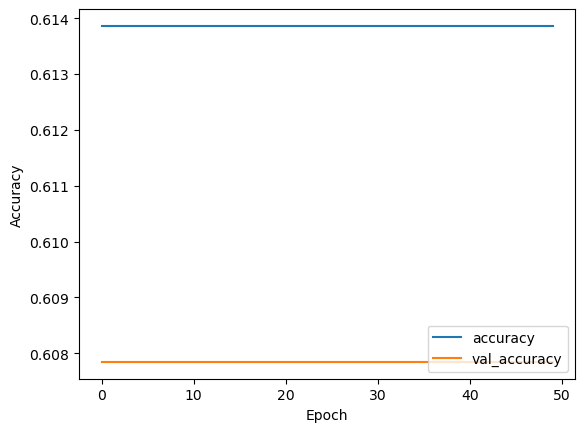

2/2 [==============================] - 0s 30ms/step


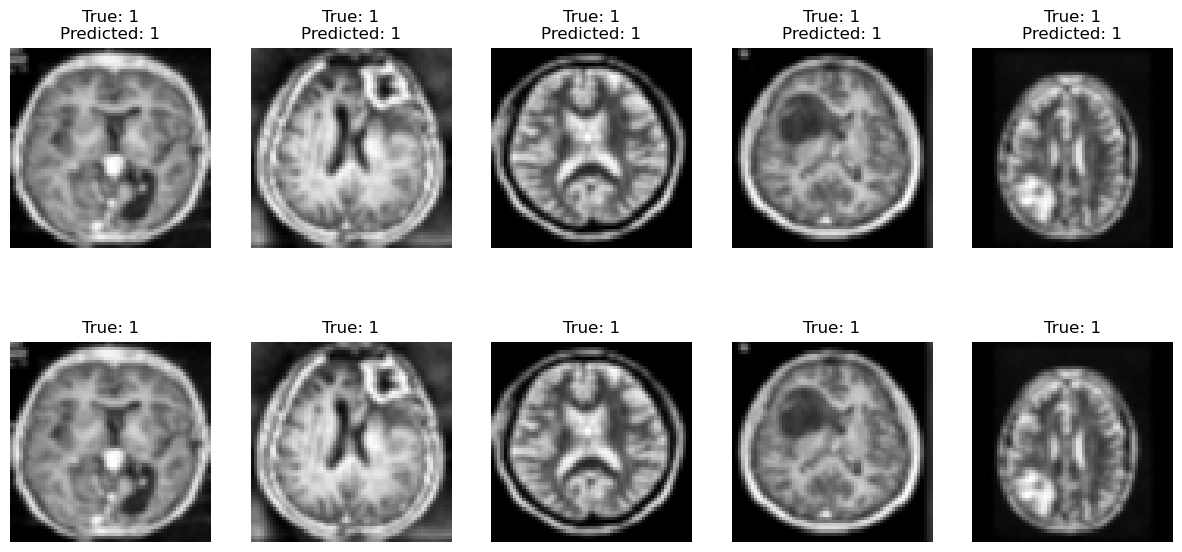

In [9]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from skimage import exposure
from keras.models import load_model



# NO TUMOR
no_tumor_class_paths = [
    "C:\\Users\\nh013\\Desktop\\Brain MRI Images for Brain Tumor Detection\\no"
]

# YES TUMOR
yes_tumor_class_paths = [
   "C:\\Users\\nh013\\Desktop\\Brain MRI Images for Brain Tumor Detection\\yes"
]



# FUNCTION FOR .........PREPROCESSING 
def advanced_preprocess(img):
    
    # HISTOGRAM EQULAIZATION
    img = exposure.equalize_adapthist(img)

    #GAUSSIAN BLUR
    img = cv2.GaussianBlur(img, (3, 3), 0)

    # RESCLAE TO THR RANGE [-1, 1]
    img = (img - 0.5) / 0.5

    return img




# LOAD TRAINING IMAGES AND LABELS
train_images = []
train_labels = []

# LOAD NO TUMOR IMAGE
for class_path in no_tumor_class_paths:
    for filename in os.listdir(class_path):
        img_path = os.path.join(class_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (64, 64))  # RESIZE IMAGE
        img = advanced_preprocess(img)
        train_images.append(img)
        train_labels.append(0)  # LABEL 0 FOR NO TUMOR

# LOAD YES TUMOR IMAGE
for class_path in yes_tumor_class_paths:
    for filename in os.listdir(class_path):
        img_path = os.path.join(class_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (64, 64))  # RESIZE IMAGE
        img = advanced_preprocess(img)
        train_images.append(img)
        train_labels.append(1)  # LABEL 1 FOR YES TUMOR

        
        
        
# CONVERT TRAINING DATA TO NUMPY ARRAYS
train_images = np.array(train_images)
train_labels = np.array(train_labels)

# NORMALIZE PIXEL VALUES
train_images = train_images / 255.0

# SPLIT TRAINING DATA INTO TRAINING AND VALIDATION SET
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Add an extra dimension to the images
X_train = np.expand_dims(X_train, axis=-1)
X_val = np.expand_dims(X_val, axis=-1)

# CONVERT LABELS TO ONE-HOT ENCODING
y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)

# DATA AUGMENTATION
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,  
    fill_mode='nearest'  
)

datagen.fit(X_train)





# BUILD CNN MODEL
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

# COMPILE MODEL
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# SET UP CALLBACKS
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)

# TRAIN MODEL
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),
                              steps_per_epoch=len(X_train) / 32,
                              epochs=50,
                              validation_data=(X_val, y_val),
                              callbacks=[checkpoint, early_stopping])




# VISUALIZE TRAINING HISTORY
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()






# LOAD THE TRAIN MODEL 
model = load_model('best_model.h5') 

# MAKE PREDICTION ON VALIDATION SET 
predictions = model.predict(X_val)

# #CONVERT ONE HOT ENCODE LABELS BACK TO INTEGER
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_val, axis=1)

# VISUALIZE SAME RANDOM PREDICTION
fig, axes = plt.subplots(2, 5, figsize=(15, 7))

for i in range(5):
    index = np.random.randint(0, len(X_val))
    
    # SHOW THE ORGINAL IMAGE WITH TURE  AND PREDICTED LABELS
    axes[0, i].imshow(X_val[index].reshape(64, 64), cmap='gray')
    axes[0, i].set_title(f'True: {true_labels[index]}\nPredicted: {predicted_labels[index]}')
    axes[0, i].axis('off')
    
    # SHOW THE ORGINAL IMAGE WITH TRUE LABELS 
    axes[1, i].imshow(X_val[index].reshape(64, 64), cmap='gray')
    axes[1, i].set_title(f'True: {true_labels[index]}')
    axes[1, i].axis('off')

plt.show()

Epoch 1/50


C:\Users\nh013\AppData\Local\Temp\ipykernel_7308\4021271533.py:124: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),


7/6 [=================================] - ETA: 0s - loss: 0.6927 - accuracy: 0.5941
Epoch 1: val_loss improved from inf to 0.69144, saving model to best_model.h5
6/6 [==============================] - 3s 270ms/step - loss: 0.6927 - accuracy: 0.5941 - val_loss: 0.6914 - val_accuracy: 0.6078
Epoch 2/50
7/6 [=================================] - ETA: 0s - loss: 0.6900 - accuracy: 0.6139
Epoch 2: val_loss improved from 0.69144 to 0.68803, saving model to best_model.h5
6/6 [==============================] - 1s 185ms/step - loss: 0.6900 - accuracy: 0.6139 - val_loss: 0.6880 - val_accuracy: 0.6078
Epoch 3/50
7/6 [=================================] - ETA: 0s - loss: 0.6863 - accuracy: 0.6139
Epoch 3: val_loss improved from 0.68803 to 0.68291, saving model to best_model.h5
6/6 [==============================] - 1s 183ms/step - loss: 0.6863 - accuracy: 0.6139 - val_loss: 0.6829 - val_accuracy: 0.6078
Epoch 4/50
7/6 [=================================] - ETA: 0s - loss: 0.6804 - accuracy: 0.6139
Ep

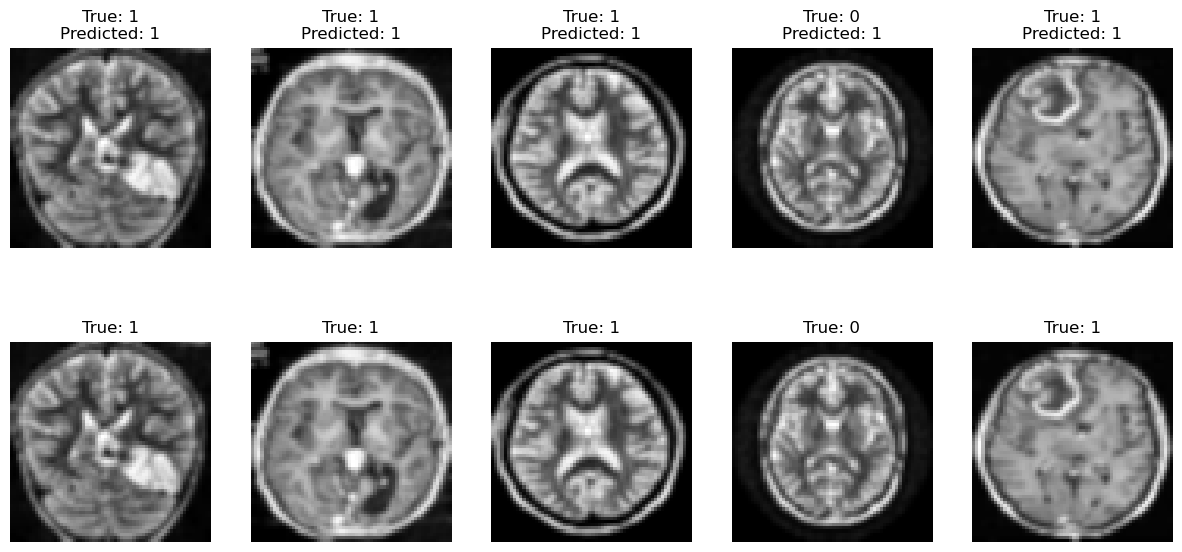

In [10]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from skimage import exposure
from keras.models import load_model



# NO TUMOR
no_tumor_class_paths = [
    "C:\\Users\\nh013\\Desktop\\Brain MRI Images for Brain Tumor Detection\\no"
]

# YES TUMOR
yes_tumor_class_paths = [
   "C:\\Users\\nh013\\Desktop\\Brain MRI Images for Brain Tumor Detection\\yes"
]



# FUNCTION FOR ......... PREPROCESSING 
def advanced_preprocess(img):
    
    # HISTOGRAM EQULAIZATION
    img = exposure.equalize_adapthist(img)

    #GAUSSIAN BLUR
    img = cv2.GaussianBlur(img, (3, 3), 0)

    # RESCLAE TO THR RANGE [-1, 1]
    img = (img - 0.5) / 0.5

    return img





# LOAD TRAINING IMAGES AND LABELS
train_images = []
train_labels = []

# LOAD NO TUMOR IMAGE
for class_path in no_tumor_class_paths:
    for filename in os.listdir(class_path):
        img_path = os.path.join(class_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (64, 64))  # RESIZE IMAGE
        img = advanced_preprocess(img)
        train_images.append(img)
        train_labels.append(0)  # LABEL 0 FOR NO TUMOR

# LOAD YES TUMOR IMAGE
for class_path in yes_tumor_class_paths:
    for filename in os.listdir(class_path):
        img_path = os.path.join(class_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (64, 64))  # RESIZE IMAGE
        img = advanced_preprocess(img)
        train_images.append(img)
        train_labels.append(1)  # LABEL 1 FOR YES TUMOR

# CONVERT TRAINING DATA TO NUMPY ARRAYS
train_images = np.array(train_images)
train_labels = np.array(train_labels)

# NORMALIZE PIXEL VALUES
train_images = train_images / 255.0

# SPLIT TRAINING DATA INTO TRAINING AND VALIDATION SET
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Add an extra dimension to the images
X_train = np.expand_dims(X_train, axis=-1)
X_val = np.expand_dims(X_val, axis=-1)

# CONVERT LABELS TO ONE-HOT ENCODING
y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)

# DATA AUGMENTATION
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,  
    fill_mode='nearest'  
)

datagen.fit(X_train)




# BUILD CNN MODEL
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

# COMPILE MODEL
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# SET UP CALLBACKS
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)

# TRAIN MODEL
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),
                              steps_per_epoch=len(X_train) / 32,
                              epochs=50,
                              validation_data=(X_val, y_val),
                              callbacks=[checkpoint, early_stopping])








# SHOW PRIDECTED "Yes Tumor" IMAGE
fig, axes = plt.subplots(2, 5, figsize=(15, 7))

for i in range(5):
    
    # FIND THE INDEX OF A "Yes Tumor" PREDICTION
    yes_tumor_indices = np.where(predicted_labels == 1)[0]
    index = np.random.choice(yes_tumor_indices)
    
    #SHOW THE ORGINAL IMAGE WITH TURE  AND PREDICTED LABELS
    axes[0, i].imshow(X_val[index].reshape(64, 64), cmap='gray')
    axes[0, i].set_title(f'True: {true_labels[index]}\nPredicted: {predicted_labels[index]}')
    axes[0, i].axis('off')
    
    # SHOW THE ORGINAL IMAGE WITH TRUE LABELS 
    axes[1, i].imshow(X_val[index].reshape(64, 64), cmap='gray')
    axes[1, i].set_title(f'True: {true_labels[index]}')
    axes[1, i].axis('off')

plt.show()
